In [81]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import pandas as pd
from scipy import stats
import math

In [90]:
data=pd.read_excel('tugas pengantar sistem informasi.xlsx')

In [91]:
data.head(10)

,bulan,warna,harga,penjualan,pendapatan
0,January,hitam,100000,800,80000000
1,February,hitam,100000,975,97500000
2,March,hitam,100000,1150,115000000
3,April,hitam,100000,1325,132500000
4,May,hitam,100000,1500,150000000
5,June,hitam,100000,1675,167500000
6,July,hitam,100000,1850,185000000
7,August,hitam,100000,2025,202500000
8,September,hitam,100000,2200,220000000
9,October,hitam,100000,2375,237500000


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   bulan       36 non-null     object
 1   warna       36 non-null     object
 2   harga       36 non-null     int64 
 3   penjualan   36 non-null     int64 
 4   pendapatan  36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


In [95]:
# Create a dictionary to map month names to month numbers
month_dict = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5,
              'June': 6, 'July': 7, 'August': 8, 'September': 9,
              'October': 10, 'November': 11, 'December': 12}

# Map month names to month numbers
data['month'] = data['bulan'].map(month_dict)


In [96]:
# Convert 'Month' column to month type
data['month1'] = pd.to_datetime(data['month'], format='%m').dt.to_period('M')

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   bulan       36 non-null     object   
 1   warna       36 non-null     object   
 2   harga       36 non-null     int64    
 3   penjualan   36 non-null     int64    
 4   pendapatan  36 non-null     int64    
 5   month       36 non-null     int64    
 6   month1      36 non-null     period[M]
dtypes: int64(4), object(2), period[M](1)
memory usage: 2.1+ KB


In [98]:
#ukuran pemusatan
mean=np.mean(data['penjualan'])
median=np.median(data['penjualan'])
mode=statistics.mode(data['penjualan'])
q1=stats.scoreatpercentile(data['penjualan'], 25)
q2=stats.scoreatpercentile(data['penjualan'], 50)
q3=stats.scoreatpercentile(data['penjualan'], 75)
skew=data['penjualan'].skew()
kurtosis=data['penjualan'].kurtosis()

#ukuran pesebaran
range=data['penjualan'].max()-data['penjualan'].min()
varians=np.var(data['penjualan'])
std_dev=np.std(data['penjualan'])
koefisien_varians=(std_dev/mean)*100

# ukuran distribusi
skew=data['penjualan'].skew()
kurtosis=data['penjualan'].kurtosis()

print("berikut ukuran pemusatan dari data")
print(f'mean = {mean}')
print(f'median = {median}')
print(f'modus = {mode}')
print(f'quartile 1 = {q1}')
print(f'quartile 2 = {q2}')
print(f'quartile 3 = {q3}')

print("\nberikut ukuran persebaran dari data")
print(f'range = {range}')
print(f'varians = {varians}')
print(f'standar deviasi = {std_dev}')
print(f'koefisien varians = {koefisien_varians:.2f}%')

print("\nberikut ukuran distribusi dari data")
print(f'skewness = {skew}')
print(f'kurtosis ={kurtosis}')

berikut ukuran pemusatan dari data
mean = 1199.3055555555557
median = 1025.0
modus = 1200
quartile 1 = 737.5
quartile 2 = 1025.0
quartile 3 = 1412.5

berikut ukuran persebaran dari data
range = 2125
varians = 325741.87885802466
standar deviasi = 570.73801245232
koefisien varians = 47.59%

berikut ukuran distribusi dari data
skewness = 1.2406235467967686
kurtosis =0.7080150895901407


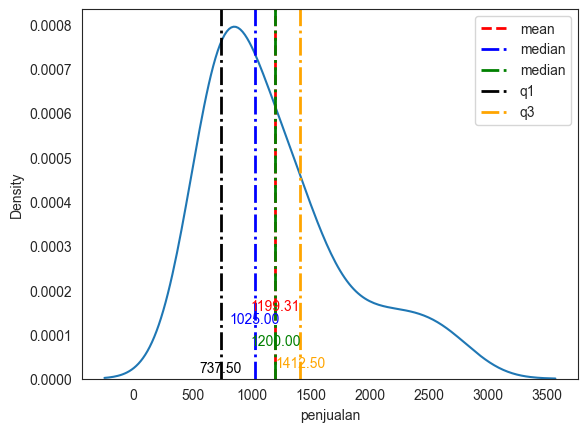

In [99]:
sns.kdeplot(data=data, x='penjualan')

#add vertical line of parameter
plt.axvline(x=mean, color='red', linestyle='--', label='mean', linewidth=2)
plt.axvline(x=median, color='blue', linestyle='dashdot', label='median', linewidth=2)
plt.axvline(x=mode, color='green', linestyle='dashdot', label='median', linewidth=2)
plt.axvline(x=q1, color='black', linestyle='dashdot', label='q1', linewidth=2)
plt.axvline(x=q3, color='orange', linestyle='dashdot', label='q3', linewidth=2)

# Add value labels
# Add value labels
plt.text(mean, 0.00018, f'{mean:.2f}', color='red', ha='center', va='top')
plt.text(median, 0.00015, f'{median:.2f}', color='blue', ha='center', va='top')
plt.text(mode, 0.0001, f'{mode:.2f}', color='green', ha='center', va='top')
plt.text(q1, 0.00004, f'{q1:.2f}', color='black', ha='center', va='top')
plt.text(q3, 0.00005, f'{q3:.2f}', color='orange', ha='center', va='top')

plt.legend()

# Display the plot
plt.show()

In [100]:
sales_total=data['penjualan'].groupby([data['month']]).sum().reset_index()
sales_total

,month,penjualan
0,1,2500
1,2,2825
2,3,3075
3,4,3335
4,5,3600
5,6,3900
6,7,3920
7,8,3935
8,9,4010
9,10,4015


C:\Users\user\AppData\Local\Temp\ipykernel_20400\1541843603.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='penjualan', data=sales_total, linewidth=2.5, estimator='sum', ci=None)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


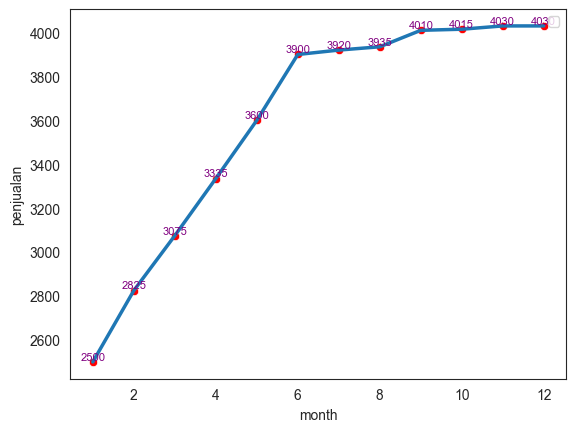

In [101]:
sns.lineplot(x='month', y='penjualan', data=sales_total, linewidth=2.5, estimator='sum', ci=None)
sns.scatterplot(x='month', y='penjualan', data=sales_total, color='red', marker='o')

# Add value annotations
for index, row in sales_total.iterrows():
    plt.text(row['month'], row['penjualan'], row['penjualan'], ha='center', va='bottom',fontsize=8, color='purple')

plt.legend()

In [102]:
sales_total=data.groupby(data['warna']).agg({'penjualan': ['sum', 'mean', 'min', 'max', np.std, np.var]}).reset_index()
sales_total

C:\Users\user\AppData\Local\Temp\ipykernel_20400\2690915674.py:1: FutureWarning: The provided callable <function std at 0x000002987F2CBD80> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  sales_total=data.groupby(data['warna']).agg({'penjualan': ['sum', 'mean', 'min', 'max', np.std, np.var]}).reset_index()
C:\Users\user\AppData\Local\Temp\ipykernel_20400\2690915674.py:1: FutureWarning: The provided callable <function var at 0x000002987F2CBEC0> is currently using SeriesGroupBy.var. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "var" instead.
  sales_total=data.groupby(data['warna']).agg({'penjualan': ['sum', 'mean', 'min', 'max', np.std, np.var]}).reset_index()


warna penjualan                                                   
               sum         mean  min   max         std            var
0   biru      8725   727.083333  700   775   24.629835     606.628788
1  hitam     21150  1762.500000  800  2725  630.971473  398125.000000
2  putih     13300  1108.333333  600  1450  262.707350   69015.151515

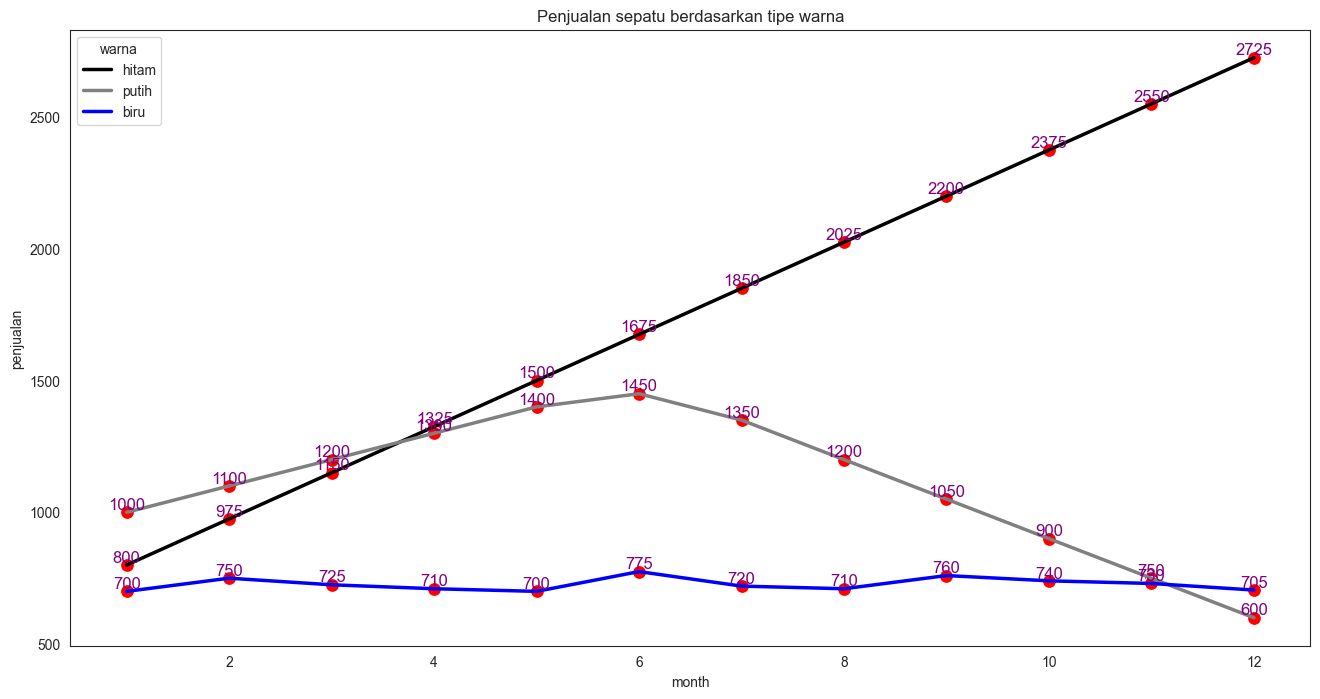

In [103]:
plt.figure(figsize=(16,8))

# Add data point markers
sns.scatterplot(x='month', y='penjualan', data=data, color='red', marker='o', s=100)

# Set the style of the chart (optional)
sns.set_style("white")
sns.lineplot(x='month', y='penjualan', data=data, hue='warna', markers='o', palette={
    'hitam': 'black', 'putih': 'grey', 'biru':'blue'}, linewidth=2.5)

plt.title('Penjualan sepatu berdasarkan tipe warna')

# Add value annotations
for index, row in data.iterrows():
    plt.text(row['month'], row['penjualan'], row['penjualan'], ha='center', va='bottom',fontsize=12, color='purple')

<Axes: xlabel='bulan', ylabel='penjualan'>

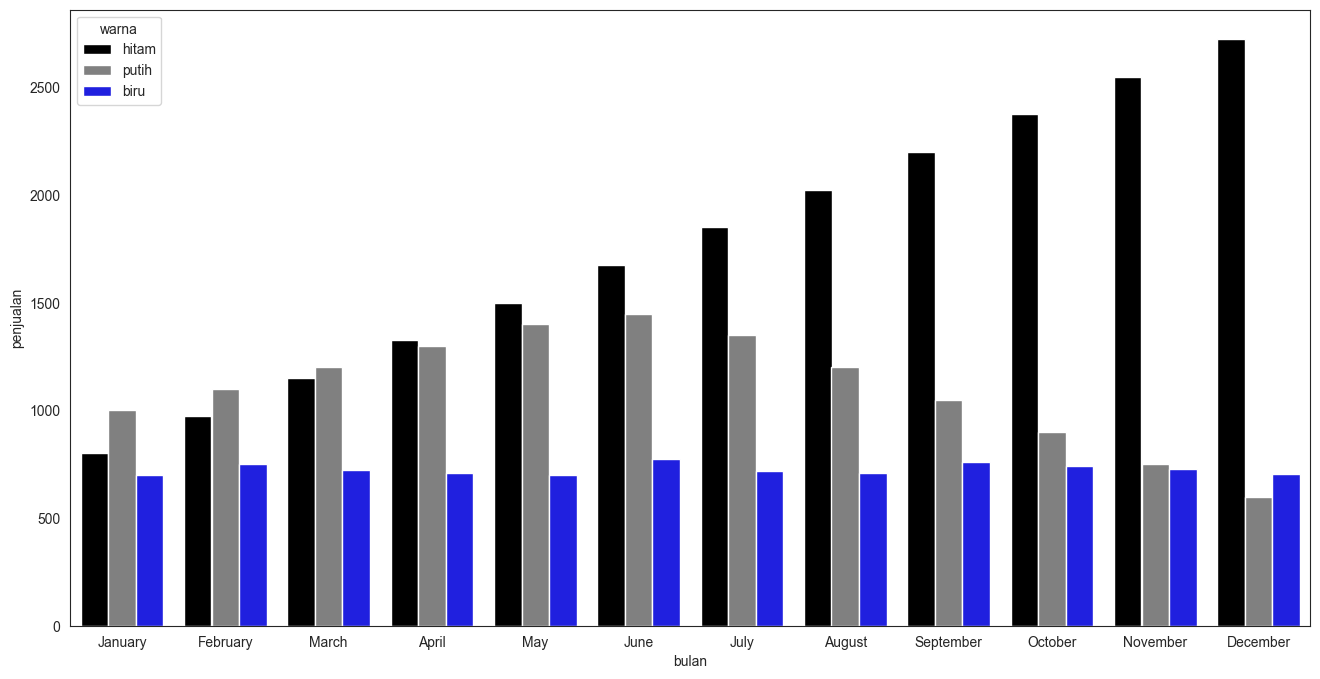

In [104]:
plt.figure(figsize=(16,8))
sns.barplot(data=data, x='bulan', y='penjualan', hue='warna', palette={'hitam': 'black', 'putih': 'grey', 'biru':'blue'})